# Car Price Prediction

 

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading custom data

In [2]:
data = pd.read_csv("cars_info.csv")
data.head()

,Make,Model,Year of manufacture,Body,Doors,Seats,Colour,Engine size,Price,Mileage,Fuel type,Fuel economy,Transmission,Horse power,Owners,Extraction time
0,Seat,Ibiza 1.4 Toca 5dr * REAR SENSORS / LOW MILEAG...,2014,Hatchback,5.0,5.0,Red,1.4,"1119,2","42,848",Petrol,47.9,Manual,84.0,2.0,16-11-2021
1,Jaguar,XE 2L R-Sport d,2018,Saloon,4.0,5.0,White,2.0,3684,"17,893",NaN,48.7,Automatic,177.0,1.0,16-11-2021
2,Ford,Focus 2.0 ST-3 TDCI 5d 183 BHP,2018,Hatchback,5.0,5.0,Black,2.0,2960,"51,149",NaN,67.3,Manual,182.0,2.0,16-11-2021
3,Toyota,AYGO 1.0 VVT-I X-PLAY 5d 69 BHP,2017,Hatchback,5.0,4.0,Blue,1.0,"1119,84","33,411",Petrol,68.9,Manual,69.0,1.0,16-11-2021
4,Vauxhall,Grandland X 1.2 SPORT NAV S/S 5d 129 BHP,2018,Hatchback,5.0,5.0,Blue,1.2,"2639,84","42,111",Petrol,55.4,Manual,128.0,1.0,16-11-2021


# Checking if the data has any null cells

In [215]:
data.isnull().sum()

Make                     0
Model                    0
Year of manufacture      0
Body                   122
Doors                  148
Seats                   50
Colour                   8
Engine size             22
Price                    0
Mileage                  1
Fuel type              506
Fuel economy            37
Transmission             0
Horse power             27
Owners                  59
Extraction time          0
dtype: int64

# Removing unimportant columns

In [4]:
data.drop('Fuel type', inplace=True, axis=1)
data.drop('Doors', inplace=True, axis=1)
data.drop('Seats', inplace=True, axis=1)
data.drop('Body', inplace=True, axis=1)
data.drop('Extraction time', inplace=True, axis=1)
data.drop('Model', inplace=True, axis=1)
data.drop('Colour', inplace=True, axis=1)

In [5]:
data.head()

,Make,Year of manufacture,Engine size,Price,Mileage,Fuel economy,Transmission,Horse power,Owners
0,Seat,2014,1.4,"1119,2","42,848",47.9,Manual,84.0,2.0
1,Jaguar,2018,2.0,3684,"17,893",48.7,Automatic,177.0,1.0
2,Ford,2018,2.0,2960,"51,149",67.3,Manual,182.0,2.0
3,Toyota,2017,1.0,"1119,84","33,411",68.9,Manual,69.0,1.0
4,Vauxhall,2018,1.2,"2639,84","42,111",55.4,Manual,128.0,1.0


# Checking if there are still missing values

In [6]:
data.isnull().sum()

Make                    0
Year of manufacture     0
Engine size            22
Price                   0
Mileage                 1
Fuel economy           37
Transmission            0
Horse power            27
Owners                 59
dtype: int64

# Converting float columns to int

In [220]:
data['Owners'] = data['Owners'].fillna(0).astype(np.int64)
data['Fuel economy'] = data['Fuel economy'].fillna(0).astype(np.int64)
data['Engine size'] = data['Engine size'].fillna(0).astype(np.int64)
data["Horse power"] = data["Horse power"].fillna(0).astype(np.int64)

# Removing rows with missing values

In [222]:
data = data.loc[data['Owners'] != 0]
data = data.loc[data['Fuel economy'] != 0]
data = data.loc[data['Engine size'] != 0]

# Checking if the cleaning was succesfull

In [223]:
data.isnull().sum()

Make                   0
Year of manufacture    0
Engine size            0
Price                  0
Mileage                0
Fuel economy           0
Transmission           0
Horse power            0
Owners                 0
dtype: int64

# Convert Price and Mileage columns to numerical format

In [7]:
data["Price"] = data["Price"].str.replace(",", "")
data['Price'] = data['Price'].apply(lambda x: x.strip('£'))
data['Price'] = pd.to_numeric(data['Price'])

In [8]:
data["Mileage"] = data["Mileage"].str.replace(",", "")
data['Mileage'] = pd.to_numeric(data['Mileage'])

In [9]:
data.head()

,Make,Year of manufacture,Engine size,Price,Mileage,Fuel economy,Transmission,Horse power,Owners
0,Seat,2014,1.4,11192,42848.0,47.9,Manual,84.0,2.0
1,Jaguar,2018,2.0,3684,17893.0,48.7,Automatic,177.0,1.0
2,Ford,2018,2.0,2960,51149.0,67.3,Manual,182.0,2.0
3,Toyota,2017,1.0,111984,33411.0,68.9,Manual,69.0,1.0
4,Vauxhall,2018,1.2,263984,42111.0,55.4,Manual,128.0,1.0


# Examining numerical features

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


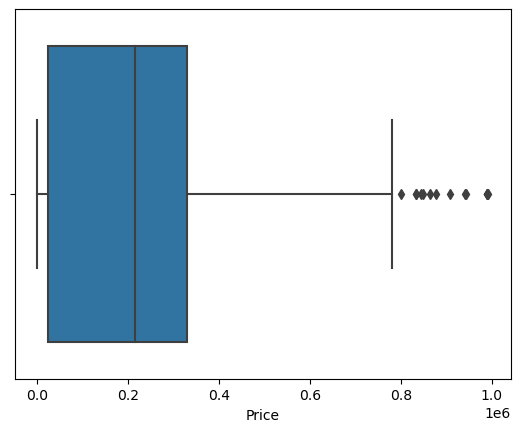

In [10]:
cols=['Price','Mileage', 'Fuel economy','Horse power','Year of manufacture', 'Engine size', 'Seats', 'Owners']
sns.boxplot(data[cols[0]]);

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


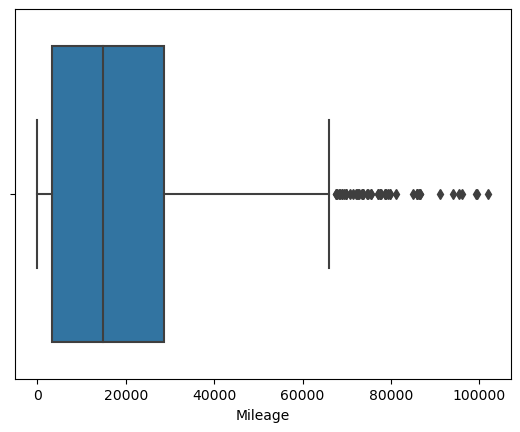

In [11]:
sns.boxplot(data[cols[1]]);

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


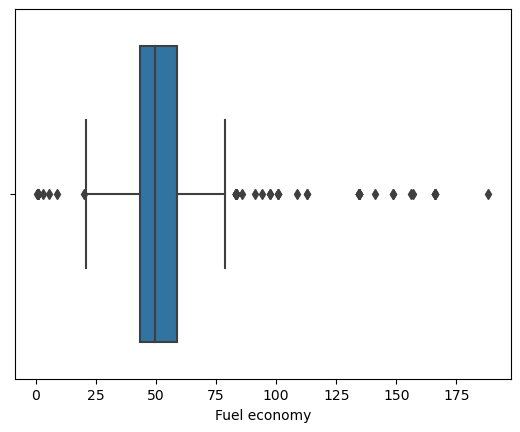

In [12]:
sns.boxplot(data[cols[2]]);

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


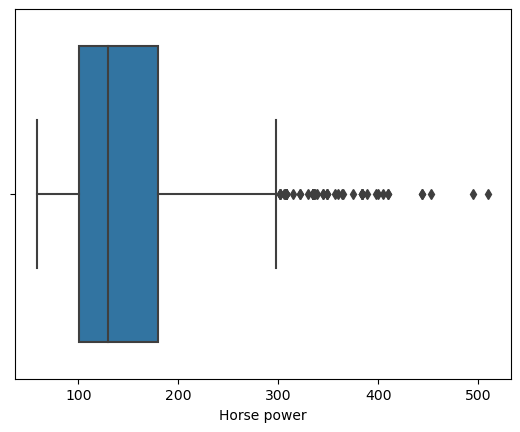

In [13]:
sns.boxplot(data[cols[3]]);

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


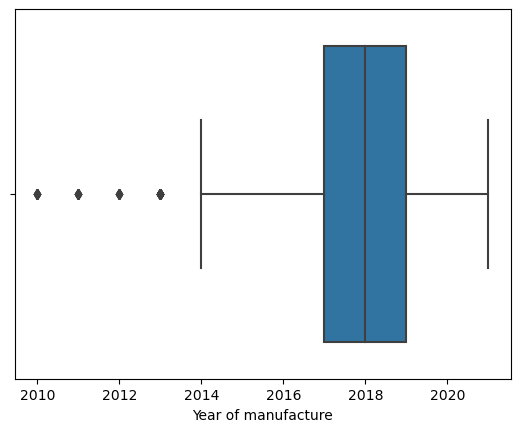

In [14]:
sns.boxplot(data[cols[4]]);

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


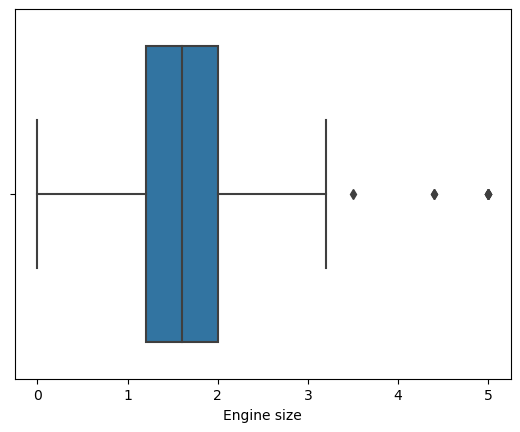

In [15]:
sns.boxplot(data[cols[5]]);

# Methods for removing the outliers

In [234]:
def find_outliers_limit(data,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper

def remove_outlier(data,col,upper,lower):
    # identify outliers
    outliers = [x for x in data[col] if x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final = np.where(data[col]>upper,upper,np.where(data[col]<lower,lower,data[col]))
    return final

# Removing the outliers

In [235]:
outlier_cols=['Price','Mileage', 'Fuel economy','Horse power','Year of manufacture', 'Engine size', 'Owners']
for col in outlier_cols:
    lower,upper=find_outliers_limit(data,col)
    data[col]=remove_outlier(data,col,upper,lower)

Price
--------------------------------------------------
Percentiles: 25th=13000.000, 75th=23999.000, IQR=10999.000
Lower: -3498.5  Upper: 40497.5
Identified outliers: 37
Non-outlier observations: 1264
Mileage
--------------------------------------------------
Percentiles: 25th=13005.000, 75th=37273.000, IQR=24268.000
Lower: -23397.0  Upper: 73675.0
Identified outliers: 48
Non-outlier observations: 1253
Fuel economy
--------------------------------------------------
Percentiles: 25th=44.000, 75th=58.000, IQR=14.000
Lower: 23.0  Upper: 79.0
Identified outliers: 47
Non-outlier observations: 1246
Horse power
--------------------------------------------------
Percentiles: 25th=103.000, 75th=180.000, IQR=77.000
Lower: -12.5  Upper: 295.5
Identified outliers: 62
Non-outlier observations: 1239
Year of manufacture
--------------------------------------------------
Percentiles: 25th=2017.000, 75th=2019.000, IQR=2.000
Lower: 2014.0  Upper: 2022.0
Identified outliers: 0
Non-outlier observations: 

# Checking how many samples are left after removing the outliers

In [236]:
data.shape

(1301, 9)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1402
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 1301 non-null   object 
 1   Year of manufacture  1301 non-null   float64
 2   Engine size          1301 non-null   float64
 3   Price                1301 non-null   float64
 4   Mileage              1301 non-null   float64
 5   Fuel economy         1301 non-null   float64
 6   Transmission         1301 non-null   object 
 7   Horse power          1301 non-null   float64
 8   Owners               1301 non-null   float64
dtypes: float64(7), object(2)
memory usage: 101.6+ KB


# Encoding the car make column

In [238]:
data.Make.unique()

array(['Seat', 'Jaguar', 'Ford', 'Toyota', 'Vauxhall', 'Mercedes-Benz',
       'Kia', 'BMW', 'DS', 'Audi', 'Mitsubishi', 'MINI', 'Hyundai',
       'Land Rover', 'Skoda', 'Volvo', 'Peugeot', 'Volkswagen', 'Mazda',
       'Dacia', 'Nissan', 'Citroen', 'Renault', 'Lexus', 'MERCEDES-BENZ',
       'PORSCHE', 'AUDI', 'MITSUBISHI', 'LOTUS', 'JAGUAR', 'MG', 'Jeep',
       'Suzuki', 'Honda', 'Fiat', 'Porsche', 'Abarth', 'Smart', 'Alfa',
       'Infiniti'], dtype=object)

In [239]:
labelencoder = LabelEncoder()
data["Make_N"] = labelencoder.fit_transform(data["Make"])

# Encoding the transmission column

In [240]:
data.Transmission.unique()

array(['Manual', 'Automatic', 'Semi Automatic'], dtype=object)

In [241]:
data["Transmission_N"] = labelencoder.fit_transform(data["Transmission"])

In [242]:
data.head()

,Make,Year of manufacture,Engine size,Price,Mileage,Fuel economy,Transmission,Horse power,Owners,Make_N,Transmission_N
0,Seat,2014.0,1.0,6995.0,42848.0,47.0,Manual,84.0,2.0,32,1
1,Jaguar,2018.0,2.0,23025.0,17893.0,48.0,Automatic,177.0,1.0,14,0
2,Ford,2018.0,2.0,18500.0,51149.0,67.0,Manual,182.0,2.0,9,1
3,Toyota,2017.0,1.0,6999.0,33411.0,68.0,Manual,69.0,1.0,36,1
4,Vauxhall,2018.0,1.0,16499.0,42111.0,55.0,Manual,128.0,1.0,37,1


# Analyzing the price column

C:\Users\alexm\OneDrive\Desktop\Dissertation\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


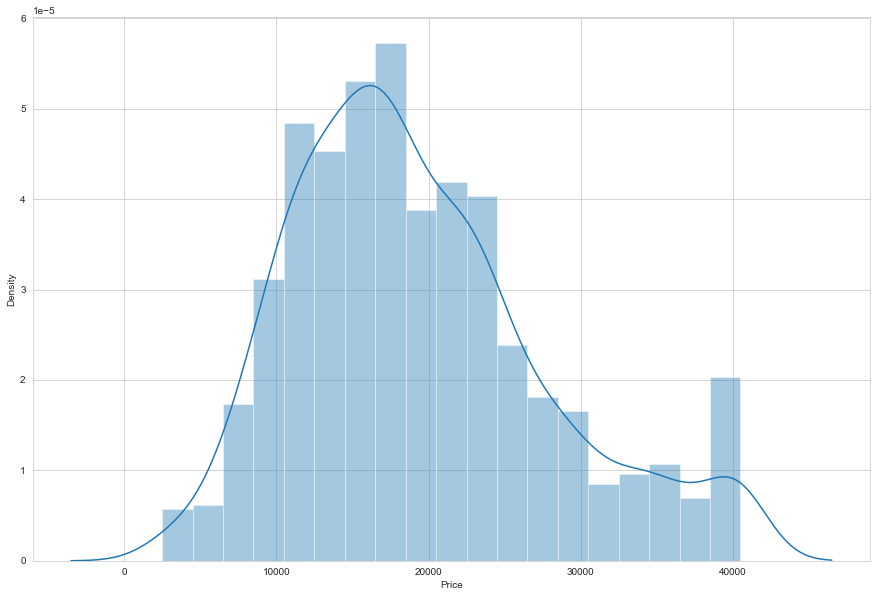

In [243]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Price)
plt.show()

# Checking the correlations between columns

In [244]:
data.corr()

,Year of manufacture,Engine size,Price,Mileage,Fuel economy,Horse power,Owners,Make_N,Transmission_N
Year of manufacture,1.000000,-0.056562,0.422230,-0.684469,-0.322373,0.015451,-0.528713,-0.032155,-0.052963
Engine size,-0.056562,1.000000,0.637892,0.088972,-0.219388,0.770003,0.093773,-0.128138,-0.491513
Price,0.422230,0.637892,1.000000,-0.329016,-0.397531,0.744955,-0.132354,-0.066987,-0.593519
Mileage,-0.684469,0.088972,-0.329016,1.000000,0.398914,0.044915,0.297992,0.075278,-0.014602
Fuel economy,-0.322373,-0.219388,-0.397531,0.398914,1.000000,-0.260503,0.088591,0.025357,0.128304
Horse power,0.015451,0.770003,0.744955,0.044915,-0.260503,1.000000,0.083370,-0.110695,-0.603398
Owners,-0.528713,0.093773,-0.132354,0.297992,0.088591,0.083370,1.000000,0.023798,-0.065705
Make_N,-0.032155,-0.128138,-0.066987,0.075278,0.025357,-0.110695,0.023798,1.000000,0.021607
Transmission_N,-0.052963,-0.491513,-0.593519,-0.014602,0.128304,-0.603398,-0.065705,0.021607,1.000000


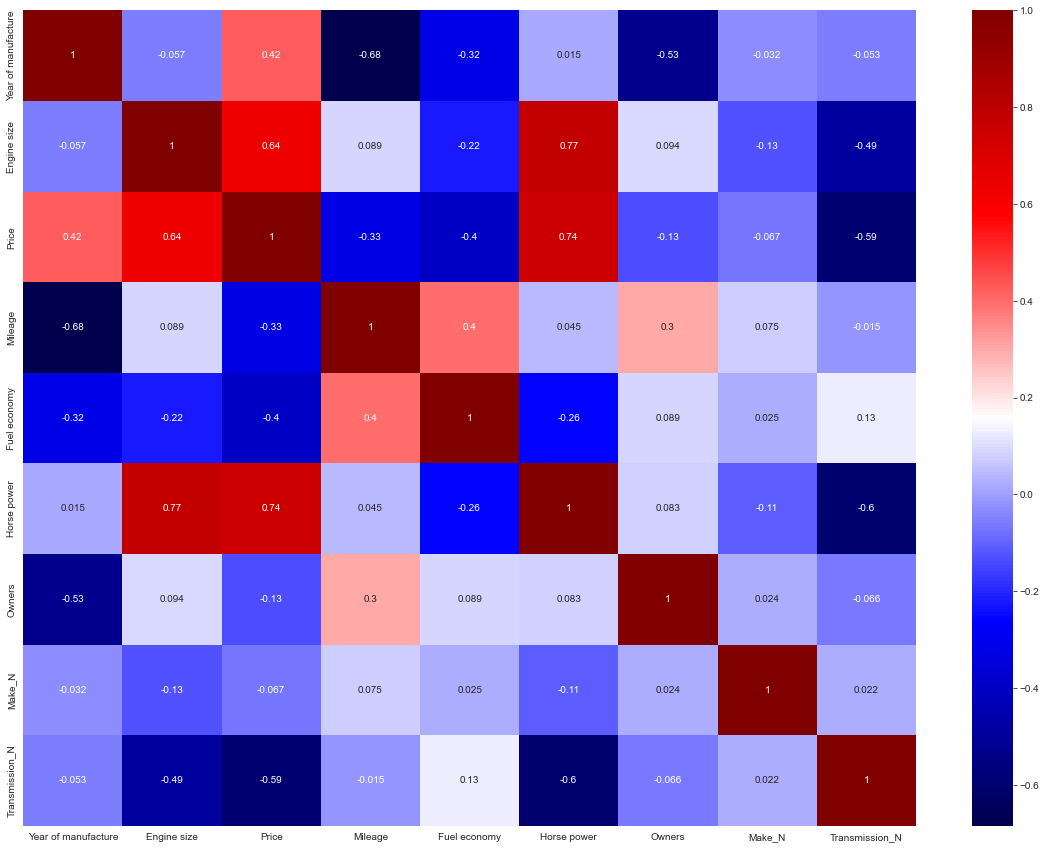

In [245]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="seismic", annot=True)
plt.show()

# Methods for training and evaluating models

In [246]:
# Model Building

def train_ml_model(x,y,model_type):

    if model_type=='lr':
        model=LinearRegression()

    elif model_type=='xgb':
        model=XGBRegressor()

    elif model_type=='rf':
        model=RandomForestRegressor()

    model.fit(X_train_scaled,np.log(y))

    return model

def model_evaluate(model,x,y):

    predictions=model.predict(x)
    predictions=np.exp(predictions)
    mse=mean_squared_error(y,predictions)
    mae=mean_absolute_error(y,predictions)
    mape=mean_absolute_percentage_error(y,predictions)
    msle=mean_squared_log_error(y,predictions)

    mse=round(mse,2)
    mae=round(mae,2)
    mape=round(mape,2)
    msle=round(msle,2)

    return [mse,mae,mape,msle]

# Splitting and scaling the data for training and testing

In [247]:
cols_drop=['Price','Transmission','Make']
x = data.drop(cols_drop,axis=1)
y = data['Price']
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.1, random_state=25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a Deep Learning model

In [255]:
model_dl_large=Sequential()
model_dl_large.add(Dense(128,input_dim=X_train_scaled.shape[1],activation='relu'))
model_dl_large.add(Dense(64,activation='relu'))
model_dl_large.add(Dense(32,activation='relu'))
model_dl_large.add(Dense(1,activation='linear'))
model_dl_large.compile(loss='mean_squared_error',optimizer='adam')
model_dl_large.summary()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)

epochs=100
batch_size=10
model_dl_large.fit(X_train_scaled,np.log(Y_train),verbose=1,validation_data=(X_test_scaled,np.log(Y_test)),epochs=epochs,batch_size=batch_size, callbacks = [es])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1152      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
117/117 [==============================] - 0s 2ms/step - loss: 20.1947 - val_loss: 2.4417
Epoch 2/100
117/117 [==============================] - 0s 1ms/step - loss: 1.766

# Plot the loss and validation loss of the dataset

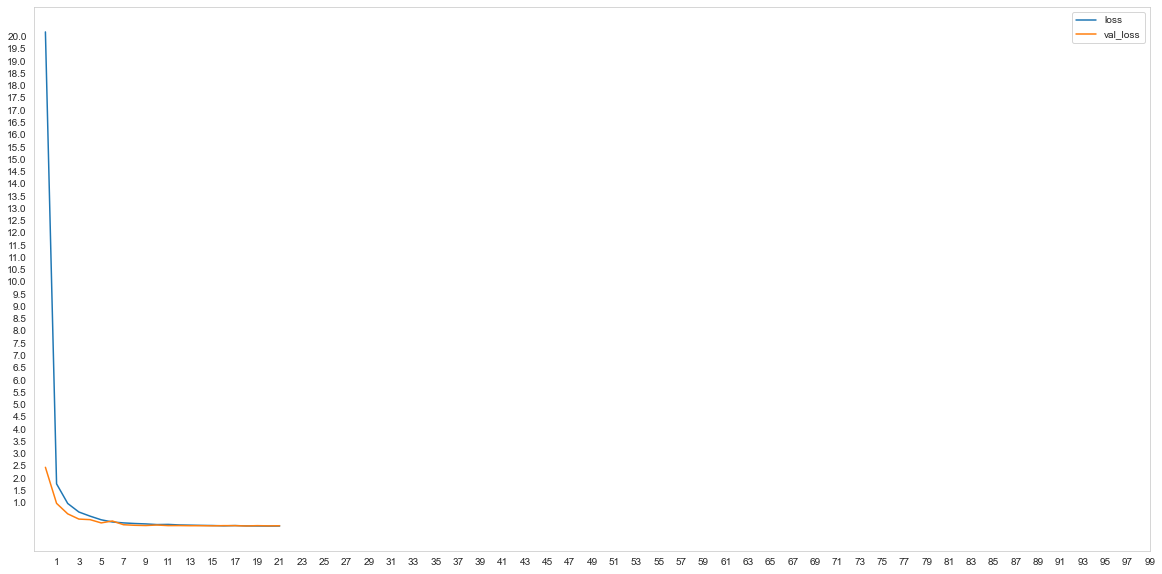

In [256]:
history_df = pd.DataFrame(model_dl_large.history.history)
plt.figure(figsize=(20,10))
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xticks(np.arange(1,epochs+1,2))
plt.yticks(np.arange(1,max(history_df['loss']),0.5))
plt.legend()
plt.grid()

# Summary of all models

In [263]:
model_lr = train_ml_model(X_train_scaled,Y_train,'lr')
model_xgb = train_ml_model(X_train_scaled,Y_train,'xgb')
model_rf = train_ml_model(X_train_scaled,Y_train,'rf')

summary = PrettyTable(['Model','MSE','MAE','MAPE','MSLE'])
summary.add_row(['LR']+model_evaluate(model_lr,X_test_scaled,Y_test))
summary.add_row(['XGB']+model_evaluate(model_xgb,X_test_scaled,Y_test))
summary.add_row(['RF']+model_evaluate(model_rf,X_test_scaled,Y_test))
summary.add_row(['DL_LARGE']+model_evaluate(model_dl_large,X_test_scaled,Y_test))
print(summary)

+----------+-------------+---------+------+------+
|  Model   |     MSE     |   MAE   | MAPE | MSLE |
+----------+-------------+---------+------+------+
|    LR    | 25118657.59 | 3684.09 | 0.2  | 0.06 |
|   XGB    | 10138474.81 | 2280.11 | 0.12 | 0.03 |
|    RF    |  9790039.58 |  2371.8 | 0.13 | 0.03 |
| DL_LARGE | 32838868.77 | 4207.41 | 0.22 | 0.06 |
+----------+-------------+---------+------+------+


# Plotting the Linear Regression graph

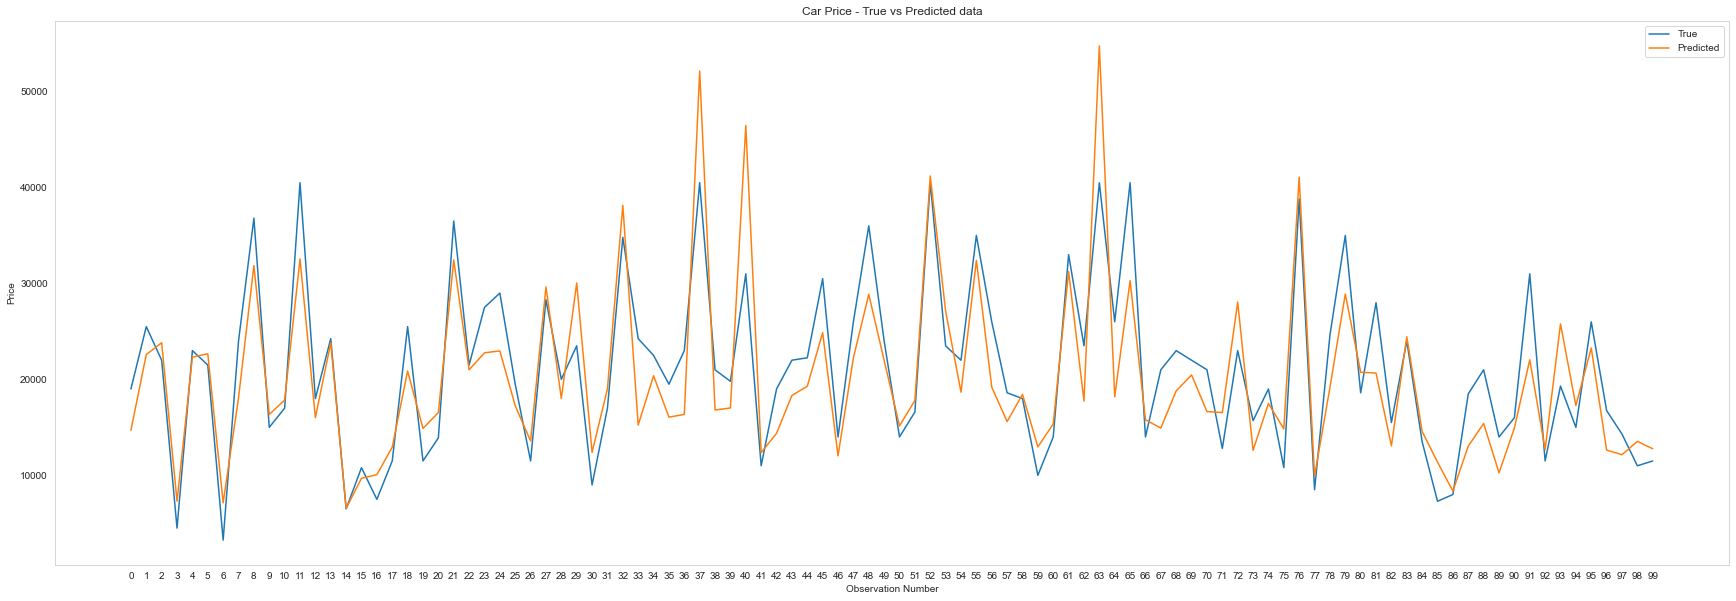

In [258]:
Y_pred=np.exp(model_lr.predict(X_test_scaled))
number_of_observations=100
X_ax = range(len(Y_test[:number_of_observations]))

plt.figure(figsize=(30,10))
plt.plot(X_ax, Y_test[:number_of_observations], label="True")
plt.plot(X_ax, Y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

# Plotting the XGBoost graph

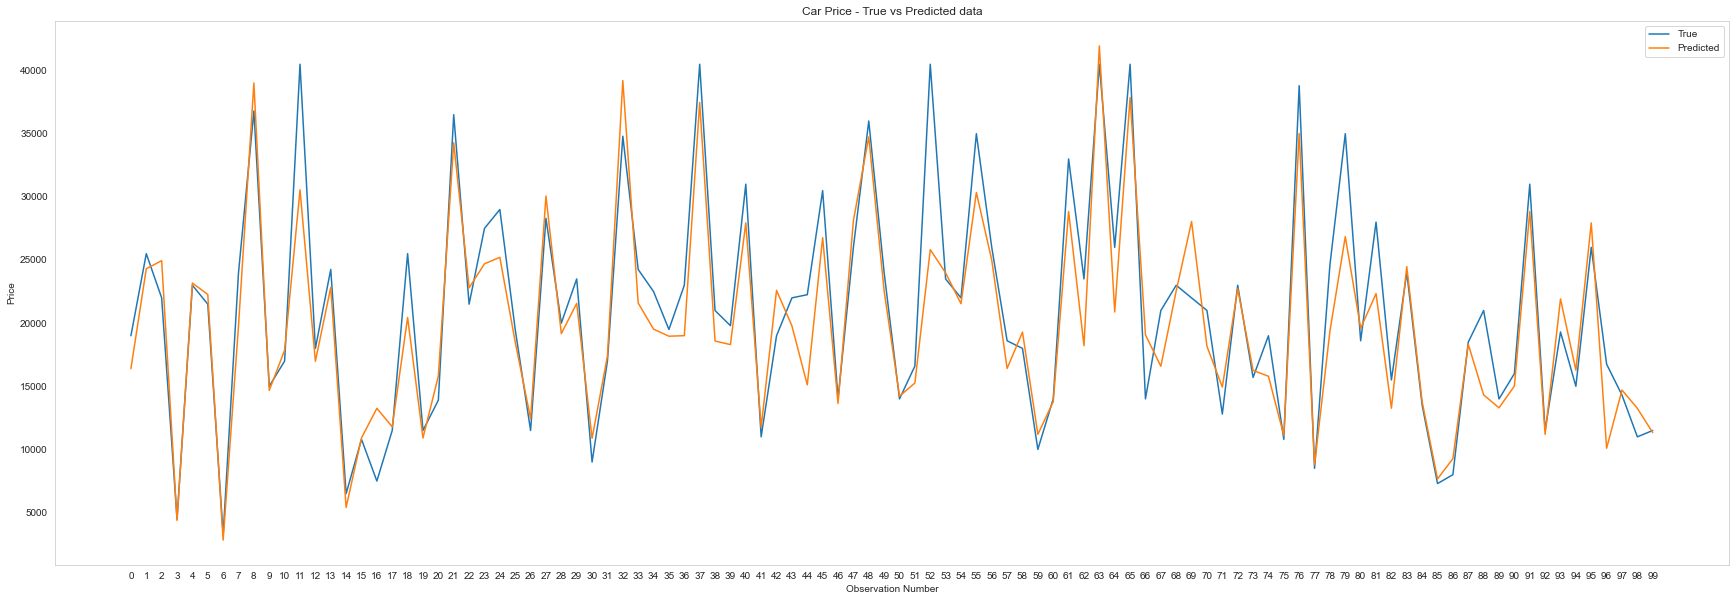

In [259]:
Y_pred=np.exp(model_xgb.predict(X_test_scaled))
number_of_observations=100
X_ax = range(len(Y_test[:number_of_observations]))

plt.figure(figsize=(30,10))
plt.plot(X_ax, Y_test[:number_of_observations], label="True")
plt.plot(X_ax, Y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

# Plotting the Random Forest graph

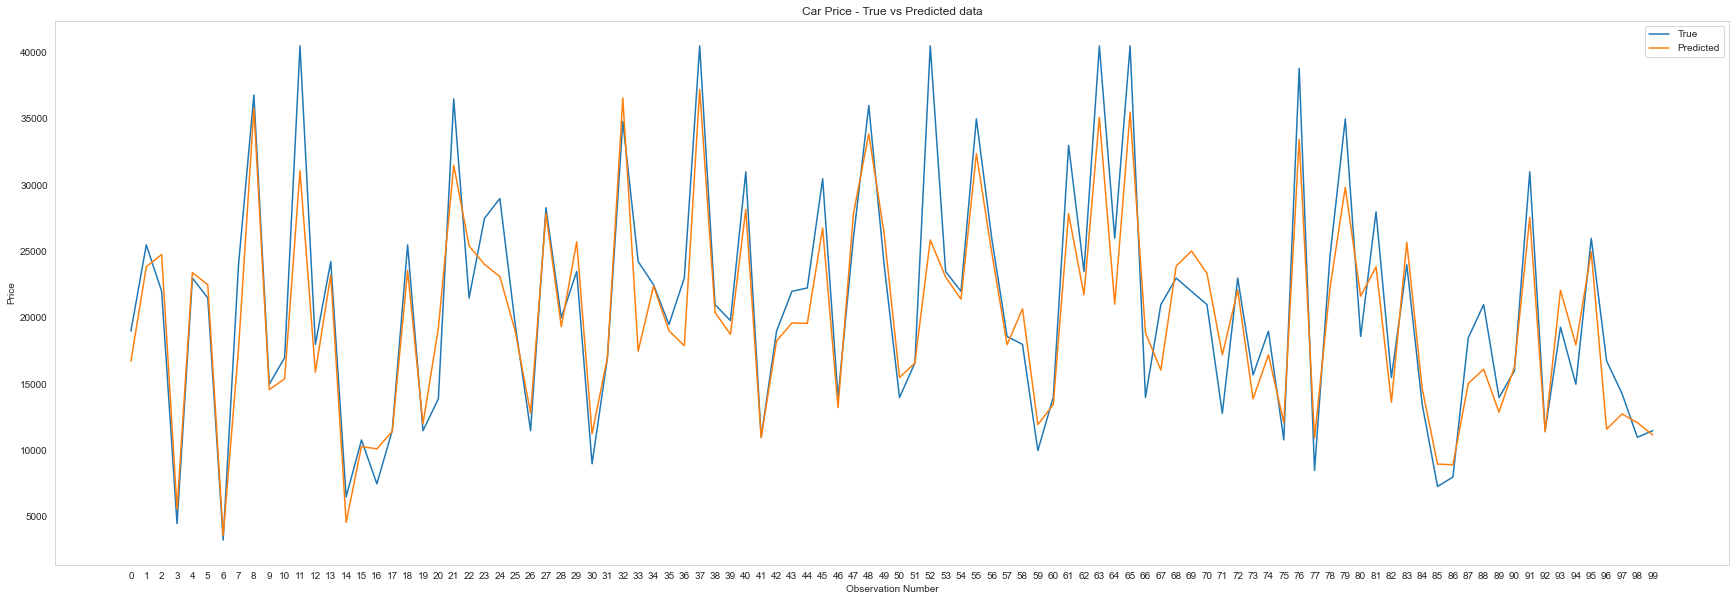

In [260]:
Y_pred=np.exp(model_rf.predict(X_test_scaled))
number_of_observations=100
X_ax = range(len(Y_test[:number_of_observations]))

plt.figure(figsize=(30,10))
plt.plot(X_ax, Y_test[:number_of_observations], label="True")
plt.plot(X_ax, Y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

# Plotting the Deep Learning graph

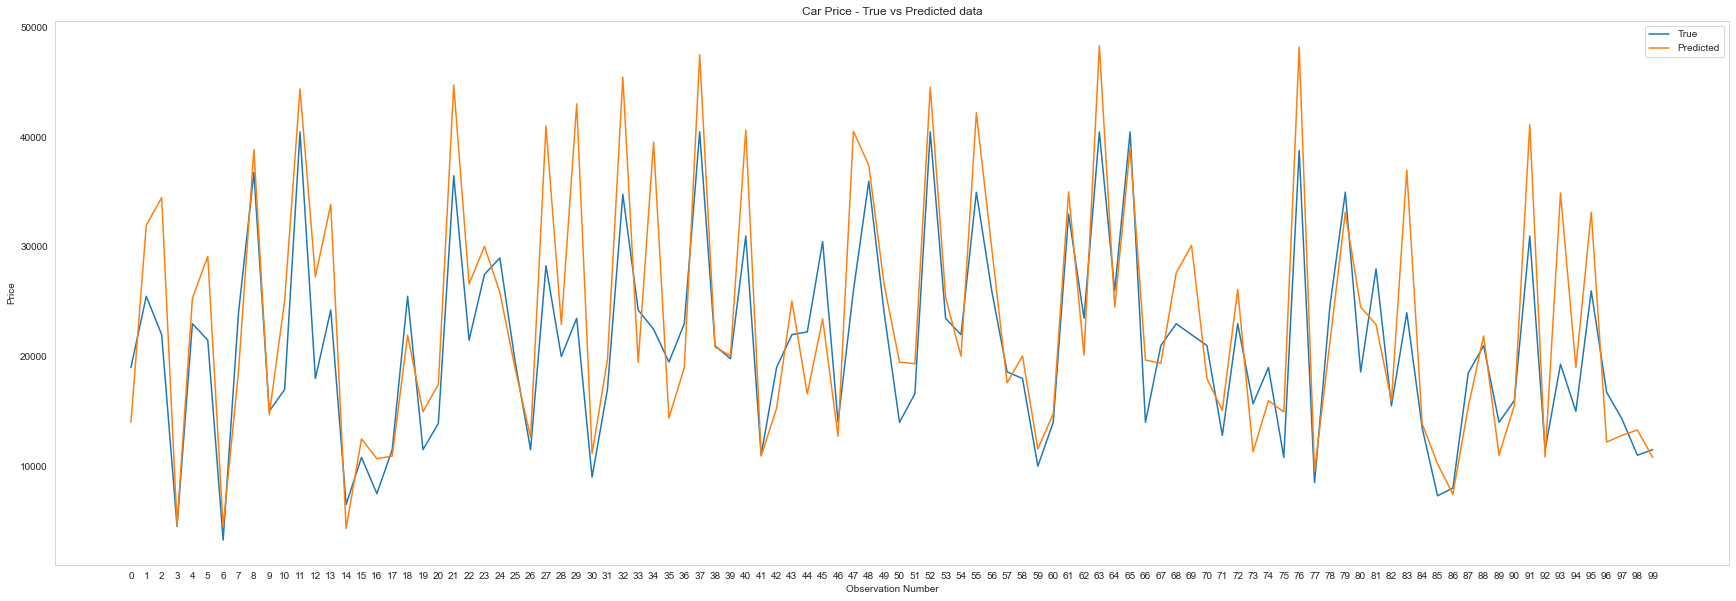

In [261]:
Y_pred=np.exp(model_dl_large.predict(X_test_scaled))
number_of_observations=100
X_ax = range(len(Y_test[:number_of_observations]))

plt.figure(figsize=(30,10))
plt.plot(X_ax, Y_test[:number_of_observations], label="True")
plt.plot(X_ax, Y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()